##**Import Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

##**Data Collection and Description**

In [75]:
df = pd.read_csv('/content/Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  ...  Age  Education Urban   US
0     9.50        138      73           11  ...   42         17   Yes  Yes
1    11.22        111      48           16  ...   65         10   Yes  Yes
2    10.06        113      35           10  ...   59         12   Yes  Yes
3     7.40        117     100            4  ...   55         14   Yes  Yes
4     4.15        141      64            3  ...   38         13   Yes   No
..     ...        ...     ...          ...  ...  ...        ...   ...  ...
395  12.57        138     108           17  ...   33         14   Yes  Yes
396   6.14        139      23            3  ...   55         11    No  Yes
397   7.41        162      26           12  ...   40         18   Yes  Yes
398   5.94        100      79            7  ...   50         12   Yes  Yes
399   9.71        134      37            0  ...   49         16   Yes  Yes

[400 rows x 11 columns]

In [76]:
df.describe().T

count        mean         std  ...     50%     75%     max
Sales        400.0    7.496325    2.824115  ...    7.49    9.32   16.27
CompPrice    400.0  124.975000   15.334512  ...  125.00  135.00  175.00
Income       400.0   68.657500   27.986037  ...   69.00   91.00  120.00
Advertising  400.0    6.635000    6.650364  ...    5.00   12.00   29.00
Population   400.0  264.840000  147.376436  ...  272.00  398.50  509.00
Price        400.0  115.795000   23.676664  ...  117.00  131.00  191.00
Age          400.0   53.322500   16.200297  ...   54.50   66.00   80.00
Education    400.0   13.900000    2.620528  ...   14.00   16.00   18.00

[8 rows x 8 columns]

In [77]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [78]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [79]:
df.shape

(400, 11)

In [80]:
label_encoder = preprocessing.LabelEncoder() 
df['US']= label_encoder.fit_transform(df['Urban'])

##**Projecting the Outliers**

###**There are 2 outlier present in the data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


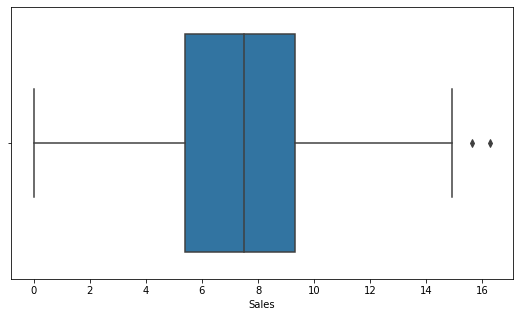

In [81]:
ax = sns.boxplot(df['Sales'])

In [82]:
plt.rcParams["figure.figsize"] = 9,5

###***The Data appears to be rightly skewed and has negative Kurtosis***

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


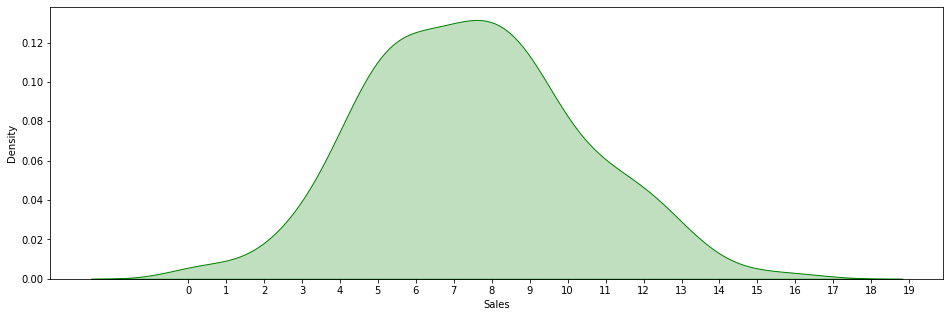

In [83]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [ ]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

In [ ]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

In [ ]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
corr = df.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

##**Decision Tree Model**

*Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"*

In [ ]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [28]:
x=df.iloc[:,0:4]
y=df['US']

In [29]:
x

CompPrice  Income  Advertising  Population
0          138      73           11         276
1          111      48           16         260
2          113      35           10         269
3          117     100            4         466
4          141      64            3         340
..         ...     ...          ...         ...
395        138     108           17         203
396        139      23            3          37
397        162      26           12         368
398        100      79            7         284
399        134      37            0          27

[400 rows x 4 columns]

In [30]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: US, Length: 400, dtype: int64

In [31]:
df['US'].unique()

array([1, 0])

In [32]:
df.US.value_counts()

1    282
0    118
Name: US, dtype: int64

In [33]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

##**Splitting data into training and testing dataset**

In [34]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=101)

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##**Decision Tree Plot** 

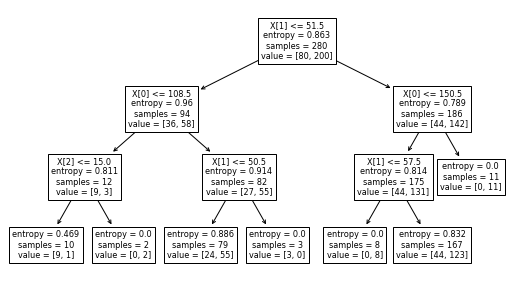

In [36]:
tree.plot_tree(model);

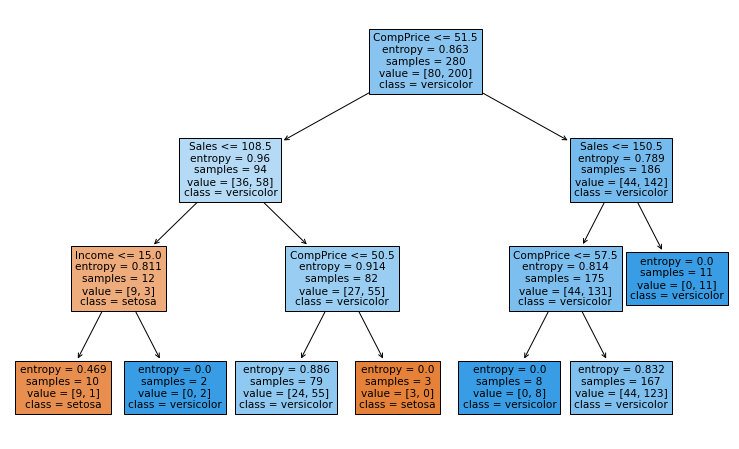

In [40]:
fn= ['Sales','CompPrice','Income','Advertising']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (13,8))
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

##**Predicting on test data and getting the count of each category**

In [41]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    117
0      3
dtype: int64

In [42]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
pd.crosstab(y_test,preds)

col_0  0   1
US          
0      0  38
1      3  79

In [44]:
np.mean(preds==y_test)

0.6583333333333333

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [46]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6583333333333333

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [71]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
model.score(X_test,y_test)

-0.9120085058854317

In [73]:
model.feature_importances_

array([0.38451803, 0.29478088, 0.32070109])